## Regresion lineal multivariable

La regresión lineal múltiple es la gran técnica estadística para comprobar hipótesis y relaciones explicativas

In [16]:
# Importos

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *  # para usar graficos en 3d
from sklearn.preprocessing import
    StandardScaler  # importando la estandar, para que el escalamiento de los datos se ajuste mejor por los valores atipicos
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                 header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


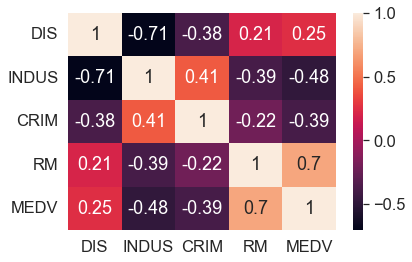

In [8]:
# VIsualizando la correlacion de variables, en las columnas escogidas
cols_choosed = ['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

sns.set(font_scale=1.5)
# Configuracion del hetmap
sns.heatmap(df[cols_choosed].corr(), cbar=True, annot=True, yticklabels=cols_choosed, xticklabels=cols_choosed)
plt.show()

In [13]:
# Creando el modelo

# Pasaremos 2 variables al modelo, para realizar la prediccion por ambas
X = df[['RM', 'INDUS']].values
print('X:')
print(X)
Y = df[['MEDV']].values.reshape(-1, 1)
print('Y:')
print(Y)
sc_x = StandardScaler()
sc_y = StandardScaler()

x_std = sc_x.fit_transform(X)
print('x_std:')
print(x_std)
y_std = sc_y.fit_transform(Y)
print('y_std:')
print(y_std)

slr = LinearRegression()
slr.fit(x_std, y_std)

X:
[[ 6.575  2.31 ]
 [ 6.421  7.07 ]
 [ 7.185  7.07 ]
 ...
 [ 6.976 11.93 ]
 [ 6.794 11.93 ]
 [ 6.03  11.93 ]]
Y:
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7

LinearRegression()

In [23]:
# Analsis de resultados

# Creando el rango del minimo al maximo para el plano cartesiano en 3d, para ambas variables en X
x1_range = np.arange(df['RM'].min(), df['RM'].max())
x2_range = np.arange(df['INDUS'].min(), df['INDUS'].max())

# Creando una malla de todas las posibles posiciones entre ambos arreglos
X1, X2 = np.meshgrid(x1_range, x2_range)

# .ravel()  // pone el arreglo en una dimension
data_to_df = {'RM': X1.ravel(), 'INDUS': X2.ravel()}
plano = pd.DataFrame(data_to_df)
plano
#plt.show()

,RM,INDUS
0,3.561,0.46
1,4.561,0.46
2,5.561,0.46
3,6.561,0.46
4,7.561,0.46
...,...,...
163,4.561,27.46
164,5.561,27.46
165,6.561,27.46
166,7.561,27.46


In [26]:
# Transformado la prediccion a la misma forma de X1
pred = slr.predict(plano).reshape(X1.shape)

pred = sc_y.inverse_transform(pred)
pred

D:\Programs\python\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([[ 41.02916025,  46.51963684,  52.01011343,  57.50059002,
         62.99106661,  68.4815432 ],
       [ 38.73517499,  44.22565158,  49.71612818,  55.20660477,
         60.69708136,  66.18755795],
       [ 36.44118974,  41.93166633,  47.42214292,  52.91261951,
         58.4030961 ,  63.89357269],
       [ 34.14720448,  39.63768108,  45.12815767,  50.61863426,
         56.10911085,  61.59958744],
       [ 31.85321923,  37.34369582,  42.83417241,  48.324649  ,
         53.81512559,  59.30560219],
       [ 29.55923397,  35.04971057,  40.54018716,  46.03066375,
         51.52114034,  57.01161693],
       [ 27.26524872,  32.75572531,  38.2462019 ,  43.73667849,
         49.22715508,  54.71763168],
       [ 24.97126346,  30.46174006,  35.95221665,  41.44269324,
         46.93316983,  52.42364642],
       [ 22.67727821,  28.1677548 ,  33.65823139,  39.14870798,
         44.63918457,  50.12966117],
       [ 20.38329296,  25.87376955,  31.36424614,  36.85472273,
         42.34519932,  47.8

C:\Users\ingegus\AppData\Local\Temp\ipykernel_9312\4129370901.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


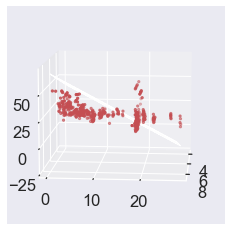

In [29]:
# Grafico de analisis
fig = plt.figure()
ax = fig.gca(projection='3d')

# alpha=0.4 // valor de transparencia
ax.plot_surface(X1, X2, pred, alpha=0.4)
# enviando las 3 variables a graficar
ax.scatter3D(df['RM'], df['INDUS'], df['MEDV'], color='r', marker='.')
# modificando la perspectiva de la vista del grafico
ax.view_init(elev=10, azim=5)
plt.show()